### PROBLEM STATEMENT

#### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.
#### About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.
#### Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##### Read the Dataset 

In [2]:
df=pd.read_csv(r"C:\Users\Afsheen Tabassum\Downloads\Country-data (1).csv")
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Dataset Description

| Column Name    | Description                                                                                      |
|----------------|--------------------------------------------------------------------------------------------------|
| *country*    | Name of the country                                                                             |
| *child_mort* | Death of children under 5 years of age per 1000 live births                                     |
| *exports*    | Exports of goods and services per capita. Given as %age of the GDP per capita                   |
| *health*     | Total health spending per capita. Given as %age of GDP per capita                               |
| *imports*    | Imports of goods and services per capita. Given as %age of the GDP per capita                   |
| *Income*     | Net income per person                                                                           |
| *Inflation*  | The measurement of the annual growth rate of the Total GDP                                      |
| *life_expec* | The average number of years a newborn child would live if the current mortality patterns remain |
| *total_fer*  | The number of children that would be born to each woman if current age-fertility rates remain   |
| *gdpp* | The GDP per capita. Calculated as the Total GDP divided by the total population.                |

In [3]:
# since country is an unique identifier of row lets set it to index 

In [4]:
df.set_index("country", inplace=True)
df.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [6]:
df.shape

(167, 9)

In [7]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
### lets look at 5 point summary 
df.describe().T


,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


###### inference 
1. all the eco factors like imports, exports, income, inflation, and GDP are right skewed showing the huge variations in economic conditions of the countries
2. health factors like child mortality, fertility rate, life expected, and health are also skewed due to huge variations of health conditions of the population of diffrent countries 

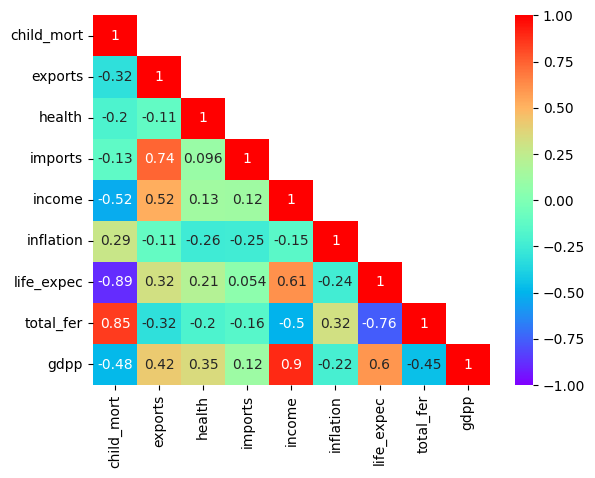

In [9]:
## lets explore the kind of realtion  these factors have amount themselves 

sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,cmap="rainbow",mask=np.triu(df.corr(),k=1))
plt.show()

# Inferences:

# 1. Higher GDP leads to higher net income per person.(0.90)
# 2. Countries with higher fertility have higher child mortality rate. This could mean poor healthcare structure in a country.(0.85)
# 3. Countries with better life_expectancy have less total fertility which indicates better healthcare.(-0.76)
# 4. Countries with better income has better life expectancy.(0.61)
# 5. Countries with better exports have better Income.(0.52)
# 6. Countries with better exports have better imports.(0.74)

### Univariate Analysis

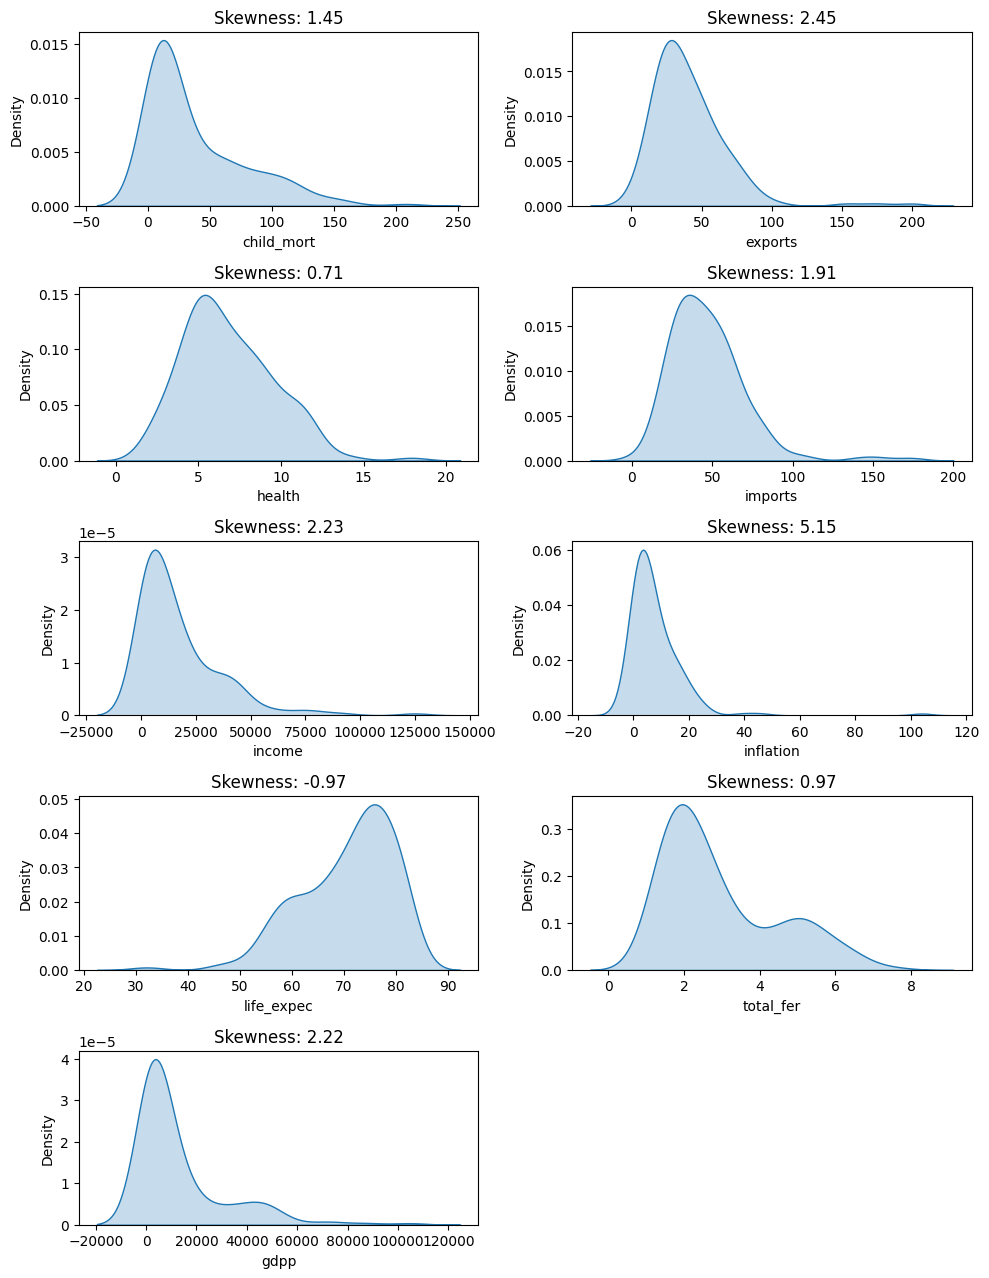

In [10]:
t=1
plt.figure(figsize=(10,15))
for i in df.columns:
    plt.subplot(6,2,t)
    sns.kdeplot(data=df, x=i, fill=True)
    plt.title(f'Skewness: {round(df[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

## Inferences:

## Most of the columns are highly right skewed
## Health is moderately right skewed. While Life expectancy is moderately left skewed.

## Multivariate Analysis:

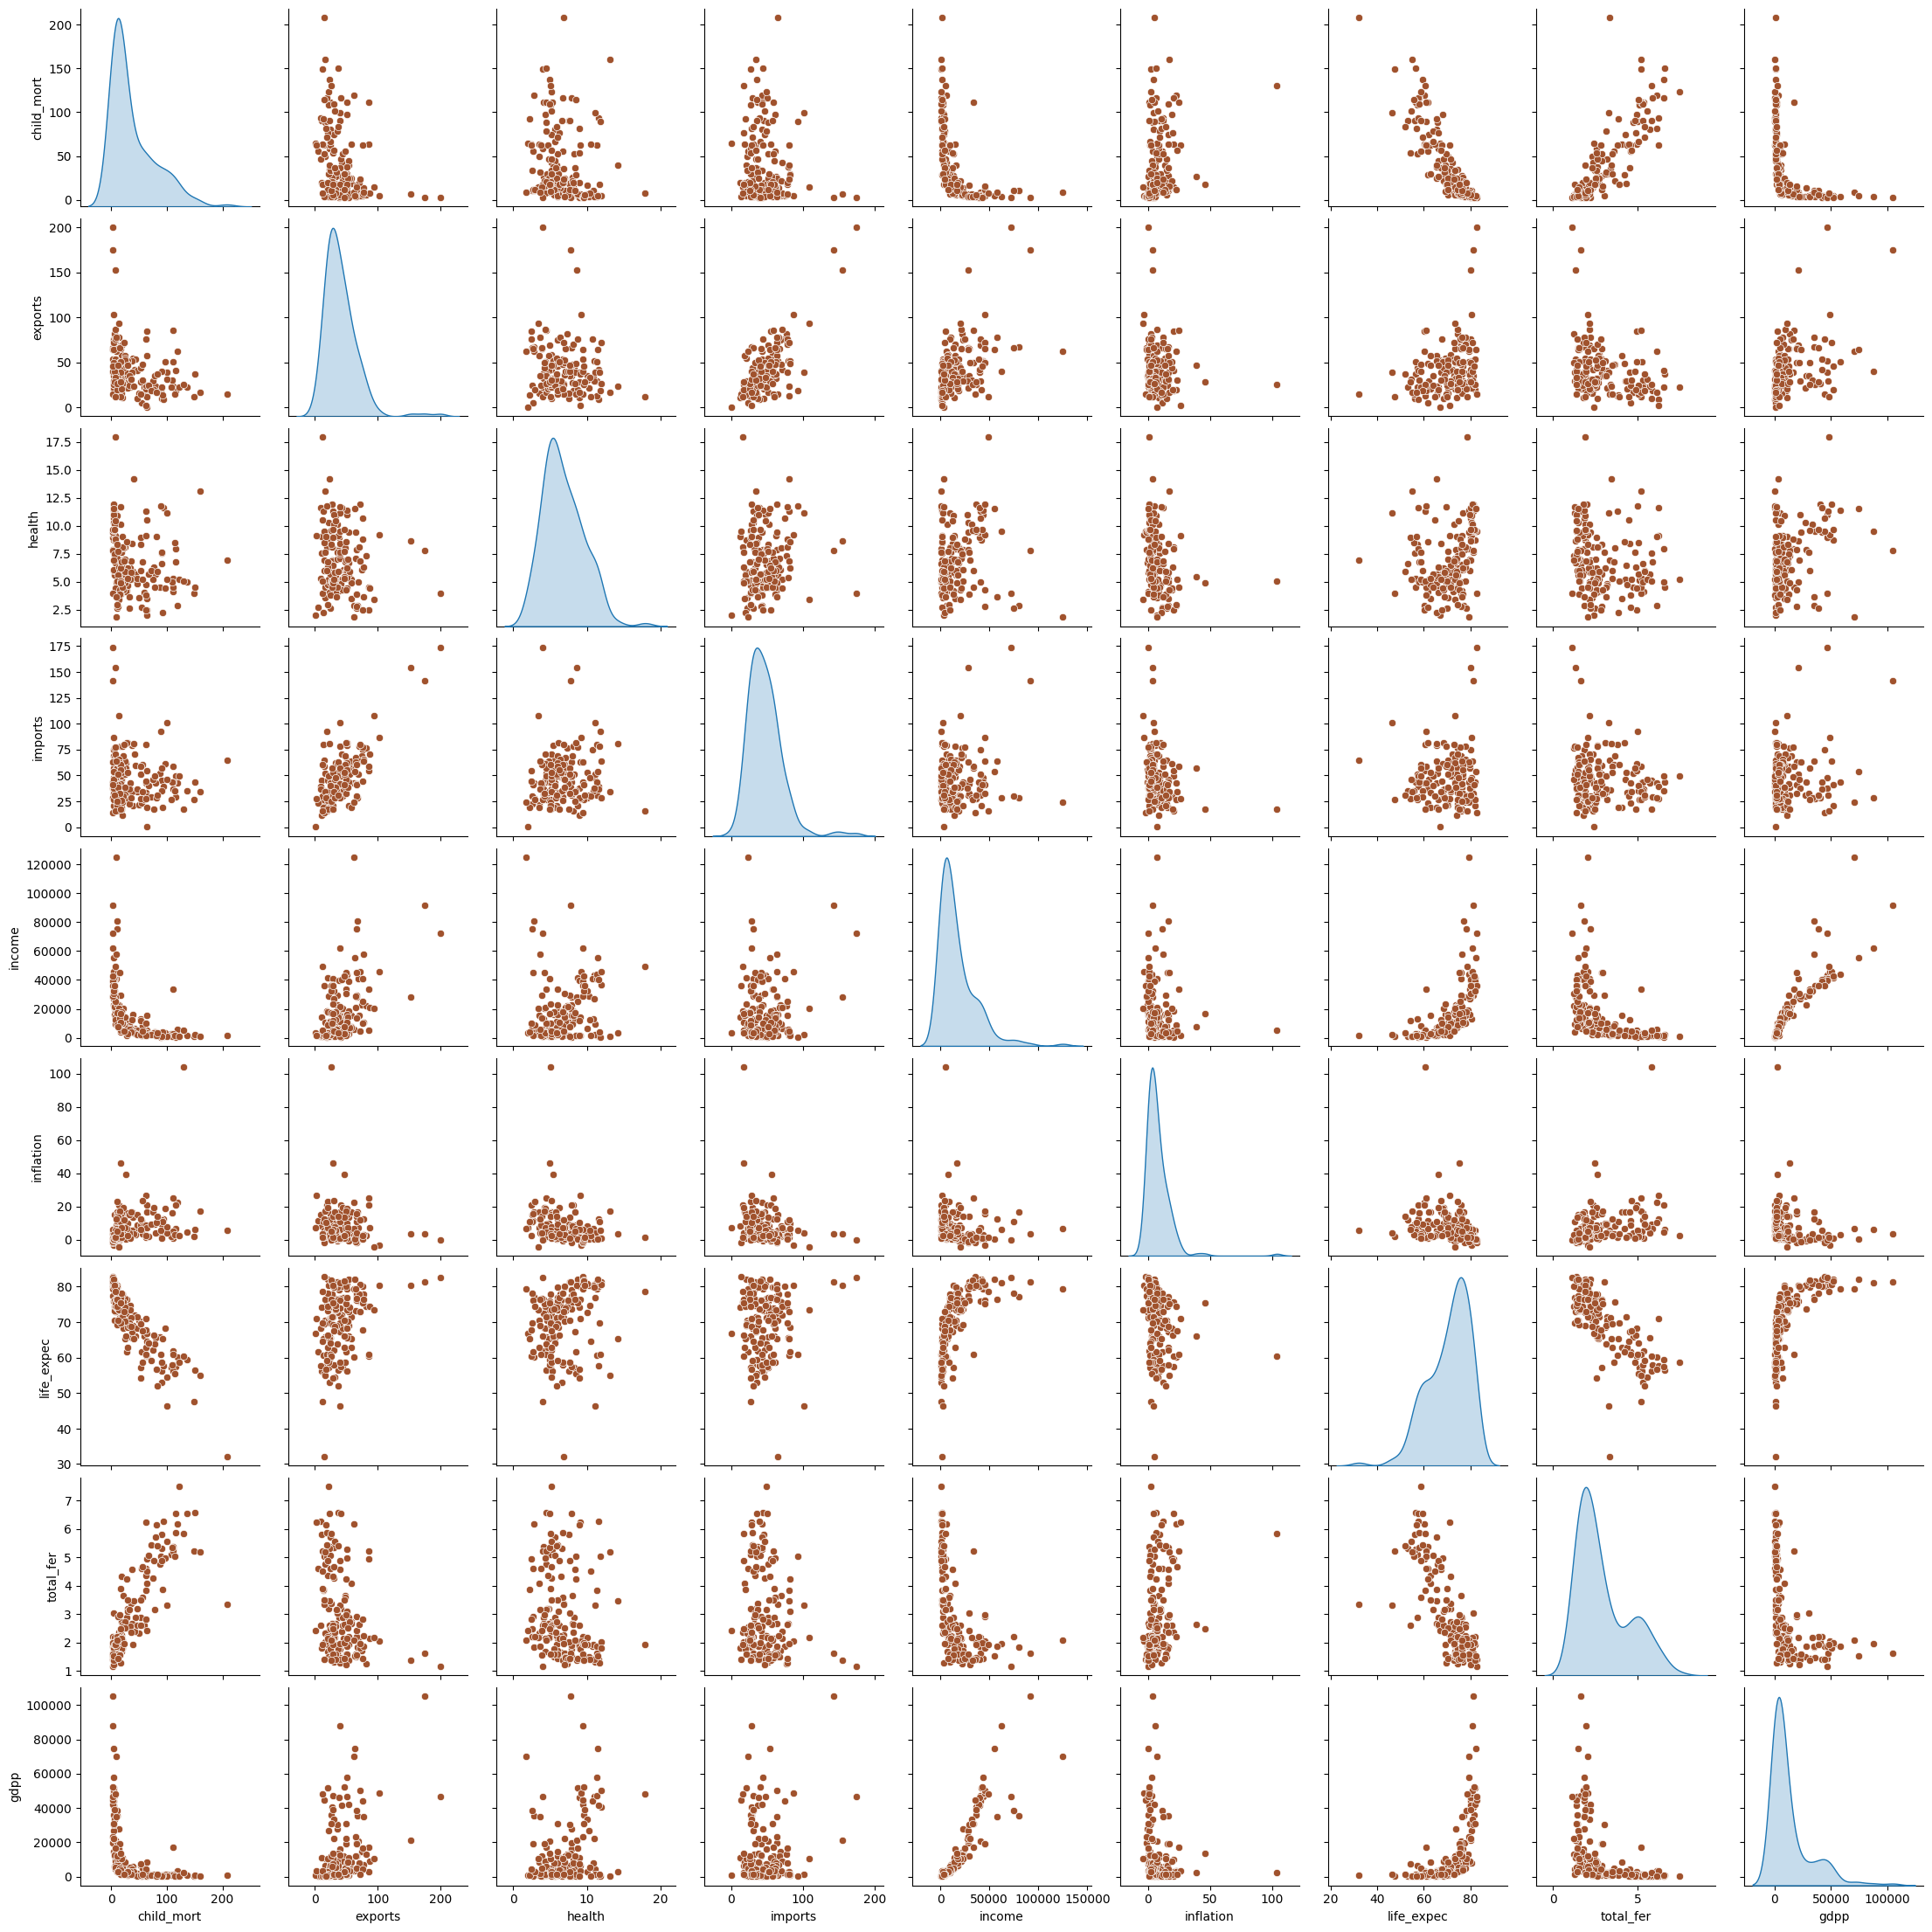

In [11]:
sns.pairplot(df,diag_kind='kde',plot_kws={'color':'sienna'})
plt.show()

## Data Preprocessing

In [12]:
## Lets check for Null Values:

df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

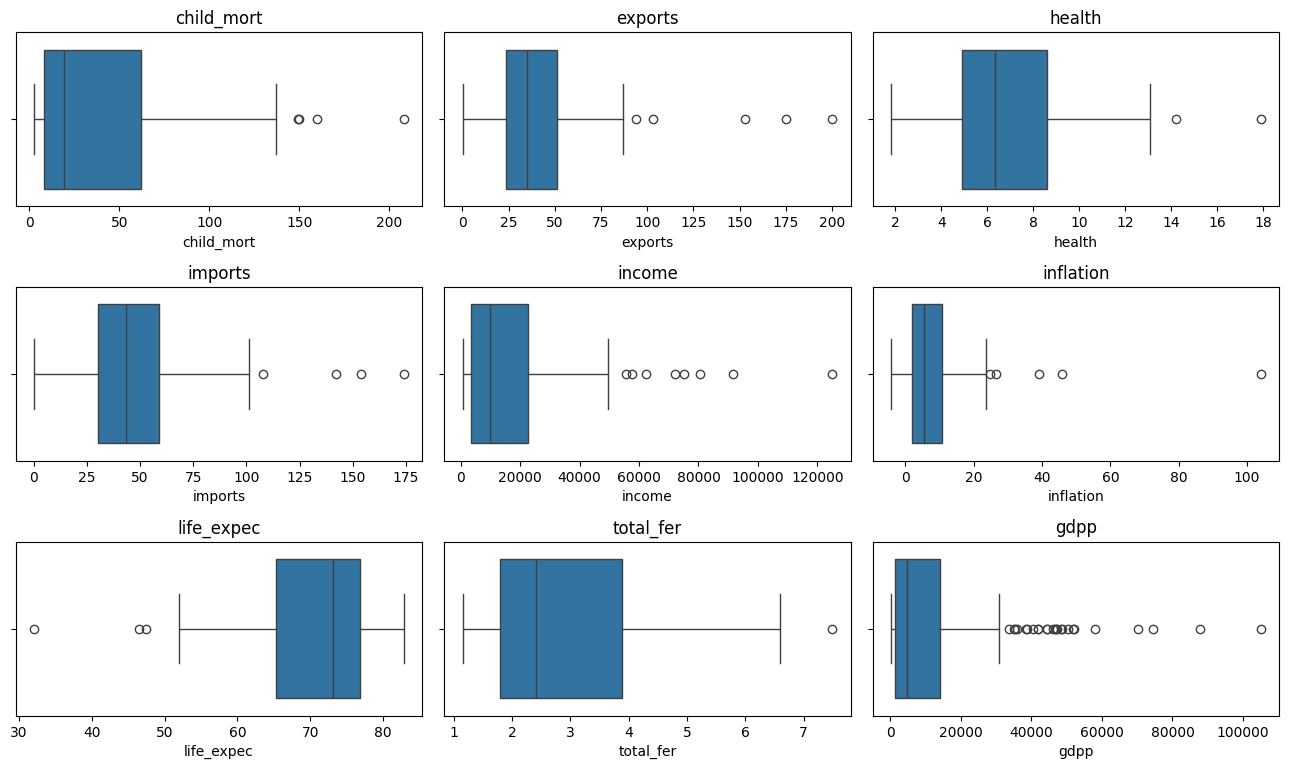

In [13]:
## Lets check for Outliers

t=1
plt.figure(figsize=(13,15))
for i in df.columns:
    plt.subplot(6,3,t)
    sns.boxplot(data=df, x=i, fill=True)
    plt.title(f'{i}')
    t+=1
plt.tight_layout()
plt.show()


In [14]:
## Lets go with capping the extreme outliers. By taking whister lenght as 2.5*IQR

for i in df.columns:
    q1,q3 = np.quantile(df[i],[0.25,0.75])
    iqr = q3 - q1
    ul , ll = q3+2.5*iqr , q1-2.5*iqr
    df[i] = df[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

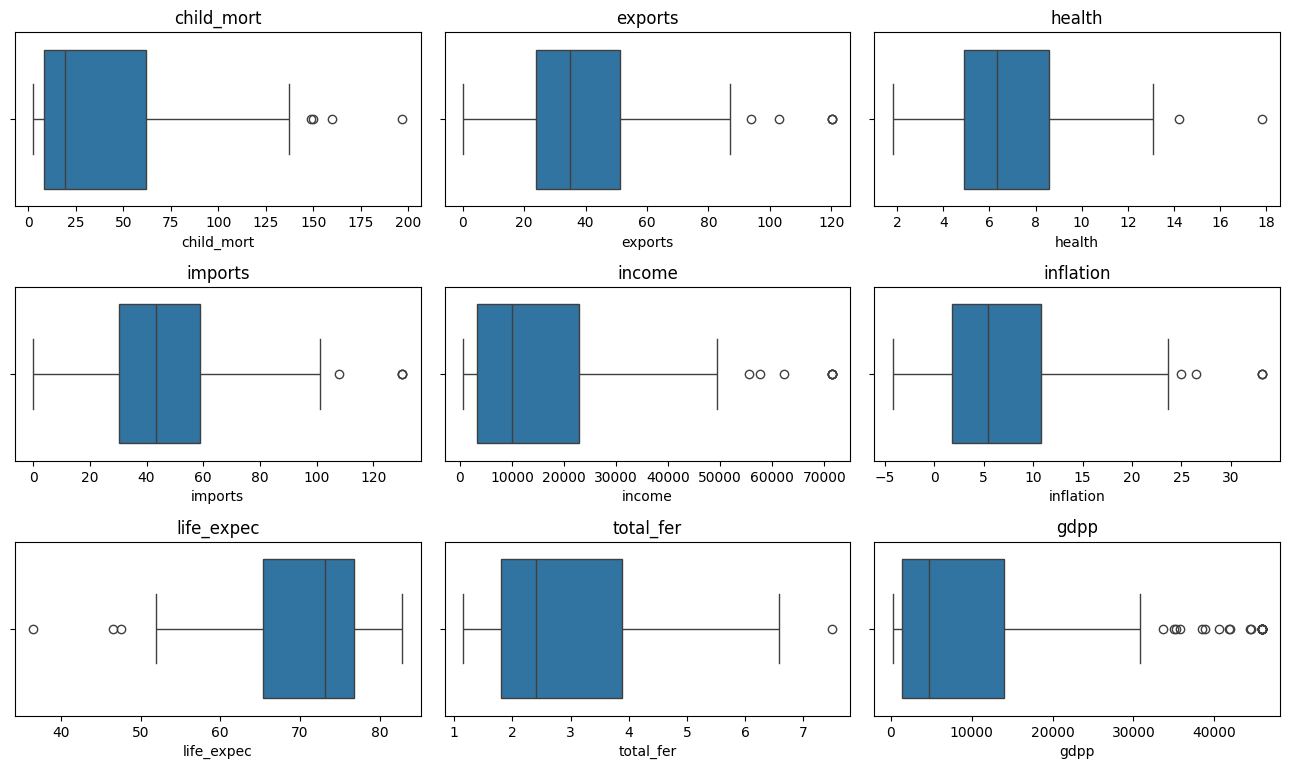

In [15]:
t=1
plt.figure(figsize=(13,15))
for i in df.columns:
    plt.subplot(6,3,t)
    sns.boxplot(data=df, x=i, fill=True)
    plt.title(f'{i}')
    t+=1
plt.tight_layout()
plt.show()

## Standardize the data

In [16]:
## Scaling (Standardizing the data)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df),columns=df.columns,index=df.index)


In [17]:
df_scaler

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.302168,-1.314143,0.279553,-0.068565,-0.878427,0.303790,-1.642400,1.902882,-0.767399
Albania,-0.540991,-0.528460,-0.096883,0.099062,-0.391534,-0.381016,0.652932,-0.859973,-0.526335
Algeria,-0.273031,-0.074510,-0.966706,-0.680176,-0.217727,1.225166,0.675771,-0.038404,-0.501118
Angola,2.023403,0.968702,-1.449130,-0.159174,-0.627373,2.096738,-1.197037,2.128151,-0.564502
Antigua and Barbuda,-0.698761,0.235398,-0.286928,0.565699,0.145102,-0.802968,0.710030,-0.541946,0.026399
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225450,0.283412,-0.571997,0.284811,-0.800009,-0.639721,-0.865869,0.365754,-0.602669
Venezuela,-0.528469,-0.506636,-0.696257,-1.305379,-0.007052,3.577027,0.550156,-0.316678,0.115000
Vietnam,-0.373203,1.392098,0.009104,1.530685,-0.709887,0.671787,0.287506,-0.661206,-0.715806


## PCA

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
pca.fit(df_scaler)

PCA(n_components=9)

In [19]:
## Lets see the Eigen Values

pca.explained_variance_

array([4.30850704, 1.51337327, 1.22641085, 0.92104999, 0.60026658,
       0.21134307, 0.143956  , 0.0850118 , 0.04429827])

In [20]:
pca.explained_variance_ratio_.cumsum()

array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697,
       0.96981892, 0.98571825, 0.99510744, 1.        ])

We will go with top 5 PCA's explaining ~95% of variance in data

In [21]:
pca_final = PCA(n_components=5)
pca_data = pca_final.fit_transform(df_scaler)

In [22]:
pca_data = pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5'],index=df.index)

In [23]:
pca_data

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119
Angola,-3.150063,1.425283,-1.784982,1.580071,0.142609
Antigua and Barbuda,1.145313,0.392985,0.151332,-0.823193,-0.370311
...,...,...,...,...,...
Vanuatu,-0.828141,0.812072,0.314558,-0.715821,-0.527346
Venezuela,-0.572007,-1.456583,-3.029355,0.232195,1.994067
Vietnam,0.391400,1.868710,-0.234175,-0.909466,1.304821


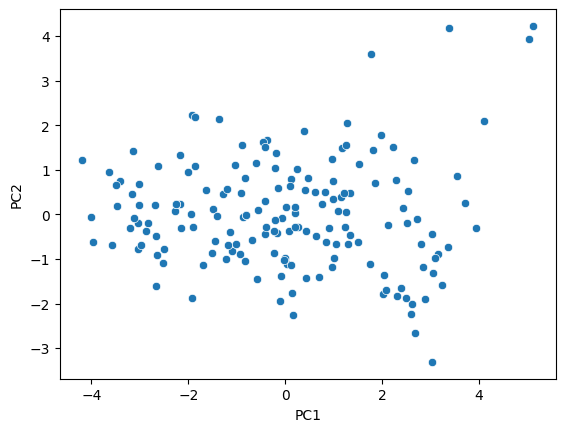

In [24]:
# lets Visuailize PC1 and PC2

sns.scatterplot(data=pca_data, x='PC1',y='PC2')
plt.show()

# Clustering 

### K-Means Clustering

In [25]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score

## for KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## for Agglomerative
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from sklearn.metrics.pairwise import euclidean_distances

In [26]:
## decide the value of K

kelbow = KElbowVisualizer(estimator= KMeans(random_state=0),k=12)

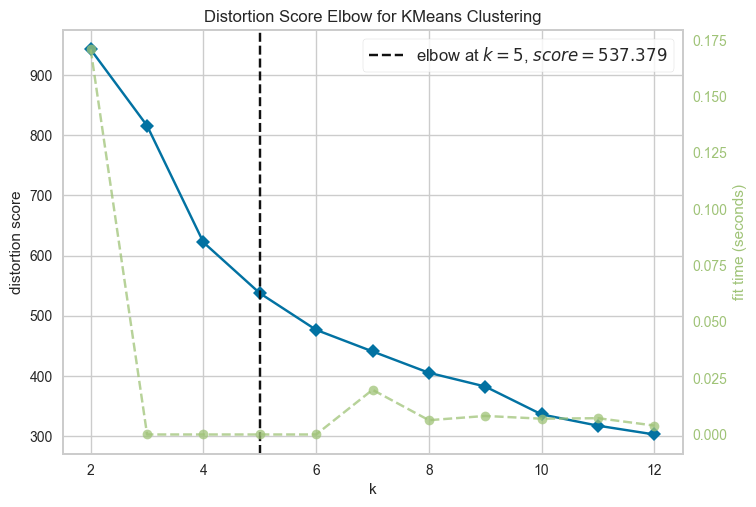

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
kelbow.fit(pca_data)
kelbow.show()

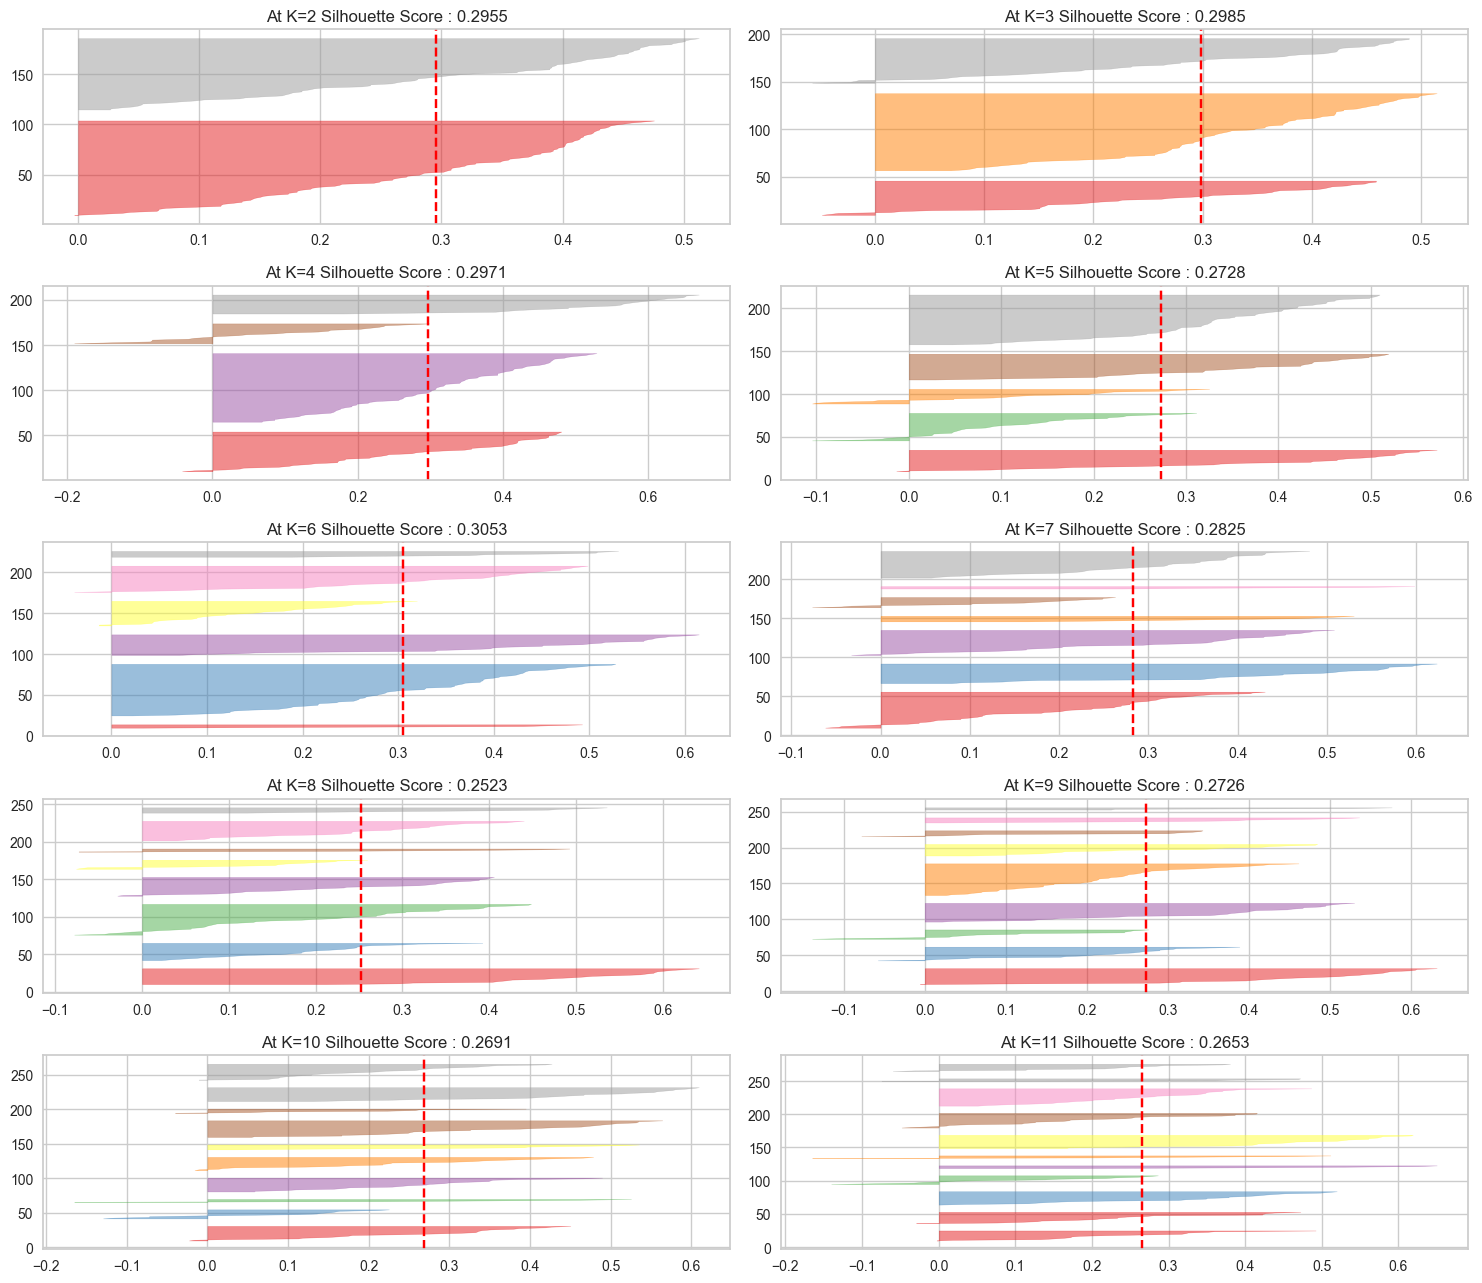

In [28]:
## It is difficult to locate the elbow in the above plot, hence we look at Silhouette Visualizar to decide the value of K

t = 1
plt.figure(figsize=(15,13))
for i in range(2,12):
    plt.subplot(5,2,t)
    model = KMeans(n_clusters=i , random_state=0,n_init=10)
    sil_vis = SilhouetteVisualizer(model)
    sil_vis.fit(pca_data)
    plt.title(f'At K={i} Silhouette Score : {round(sil_vis.silhouette_score_,4)}')
    t+=1
plt.tight_layout()
plt.show()

In [29]:
# Inference : We will go with k=2

## K>3 has outliers clusters with low densities

### K=3 Clustering

In [30]:
kmean_final = KMeans(n_clusters=3, random_state=0,n_init=10) 

kmean_pred = kmean_final.fit_predict(pca_data)

In [31]:
kmean_pred

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

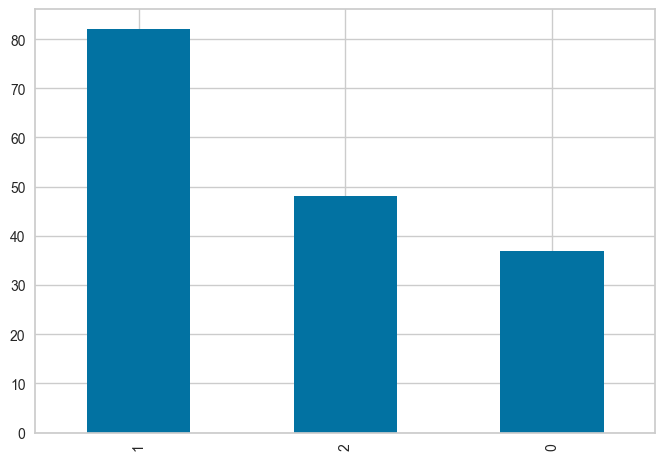

In [32]:
pd.Series(kmean_pred).value_counts().plot(kind='bar')
plt.show()

In [33]:
df['Labels']= kmean_pred

In [34]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,1
Venezuela,17.1,28.5,4.91,17.6,16500.0,33.10,75.4,2.47,13500.0,1
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,1


## Business Interpretation 

In [35]:
df.groupby(by='Labels').mean().T

Labels,0,1,2
child_mort,5.237838,21.508537,92.131771
exports,53.575000,40.797317,28.546229
health,8.780270,6.231951,6.296458
imports,49.129054,48.097561,41.443040
income,42690.878378,12281.097561,3937.770833
inflation,2.588432,7.474744,10.438854
life_expec,79.956757,72.875610,59.438542
total_fer,1.755676,2.311707,4.953958
gdpp,36905.405405,6291.146341,1902.916667


In [36]:
lap_map = {0:'Developed',1:'Developing',2:'Underdeveloped'}

In [37]:
df['Labels'] = df['Labels'].map(lap_map)

In [38]:
df[df['Labels']=='Underdeveloped'].index.to_list()

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [39]:
df[df['Labels']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [40]:
df[df['Labels']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', '

In [41]:
import sklearn
print(sklearn.__version__)

1.5.2


In [42]:
pca_data

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119
Angola,-3.150063,1.425283,-1.784982,1.580071,0.142609
Antigua and Barbuda,1.145313,0.392985,0.151332,-0.823193,-0.370311
...,...,...,...,...,...
Vanuatu,-0.828141,0.812072,0.314558,-0.715821,-0.527346
Venezuela,-0.572007,-1.456583,-3.029355,0.232195,1.994067
Vietnam,0.391400,1.868710,-0.234175,-0.909466,1.304821


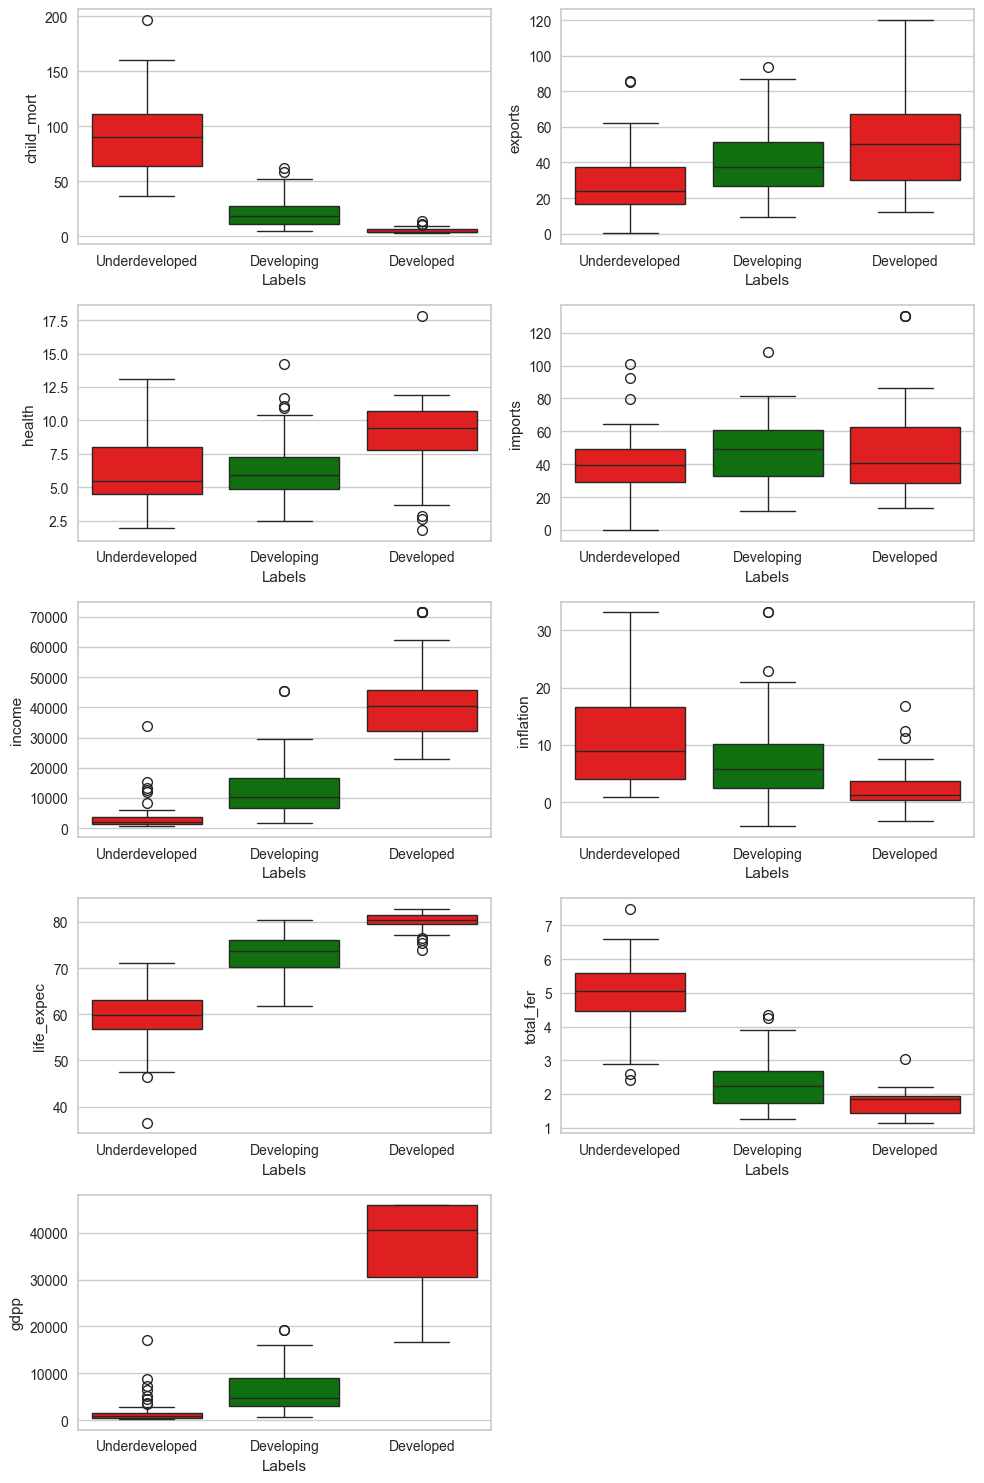

In [43]:
## Lets explore these categories
## Boxplot 

t=1
plt.figure(figsize=(10,15))
for i in df.columns:
    if i != 'Labels':
        plt.subplot(5,2,t)
        sns.boxplot(data=df, x='Labels',y=i, palette=['red','green'])
        t+=1
plt.tight_layout()
plt.show()

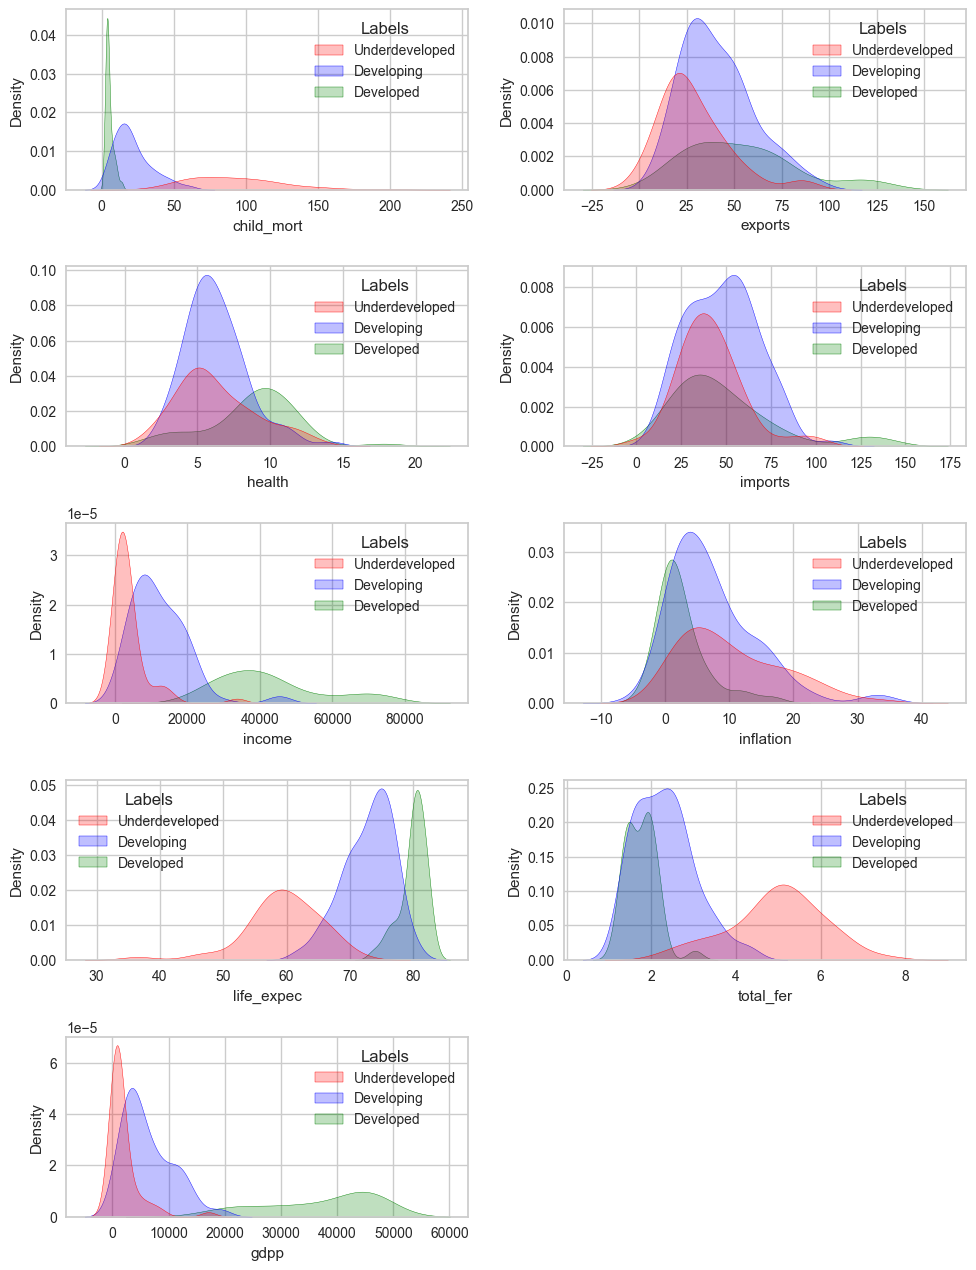

In [44]:
t=1
plt.figure(figsize=(10,15))
for i in df.columns:
    if i != 'Labels':
        plt.subplot(6,2,t)
        sns.kdeplot(data=df, x=i,hue='Labels',palette=['red','blue','green'],fill=True)
        t+=1
plt.tight_layout()
plt.show()

### *INFERENCE:
- child mortality, income, inflation and total fertility is significantly high in countries that require funds
- GDP, income and life expectancy is significantly low in countries which require funds.

In [45]:
## Plot these countried on world map to see countries of which continents require more funds

import plotly.express as px

In [46]:
#pip install plotly

In [47]:
from warnings import filterwarnings
filterwarnings('ignore')

In [48]:
#pip install nbformat

In [49]:
px.choropleth(data_frame=df,locationmode='country names',locations=df.index,color='Labels',color_discrete_map={"Underdeveloped":'red','Developing':'yellow','Developed':'green'})

## Deployment

In [51]:
## We can make predictions using KMeans Clustering. It can Assign a centroid to the new datapoint and will classify it.

df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Underdeveloped
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Developing


In [62]:
d = [90.2,10,7.58,44.9,1610.0,2.44,56.2,5.82,1000] # New data(To be predicted)

In [63]:
d_s = scaler.transform([d])

In [64]:
d_pc = pca_final.transform(d_s)

In [65]:
kmean_final.predict(d_pc)

array([2], dtype=int32)

In [66]:
import pickle

In [68]:
## Lets save all the instances as pickle files
## wb = to write anything in a file or create a file

with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [69]:

with open('pca.pkl','wb') as file:
    pickle.dump(pca_final,file)

In [70]:

with open('model.pkl','wb') as file:
    pickle.dump(kmean_final,file)